In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot
import cv2

Using TensorFlow backend.


In [12]:
train = []
train_name = []
    
for i in range(1,16):
    img = cv2.imread('./hand_writing/train/circle/circle0' + '%02d'%i + '.png', 0)
    train.append(img)
    train_name.append(0)
    
for i in range(1,16):
    img = cv2.imread('./hand_writing/train/rectangle/rectangle0' + '%02d'%i + '.png', 0)
    train.append(img)
    train_name.append(1)
    
for i in range(1,16):
    img = cv2.imread('./hand_writing/train/triangle/triangle0' + '%02d'%i + '.png', 0)
    train.append(img)
    train_name.append(2)

In [13]:
test = []
test_name = []

for i in range(1,6):
    img = cv2.imread('./hand_writing/test/circle/circle0' + '%02d'%(i+20) + '.png', 0)
    test.append(img)
    test_name.append(0)
    
for i in range(1,6):
    img = cv2.imread('./hand_writing/test/rectangle/rectangle0' + '%02d'%(i+20) + '.png', 0)
    test.append(img)
    test_name.append(1)
    
for i in range(1,6):
    img = cv2.imread('./hand_writing/test/triangle/triangle0' + '%02d'%(i+20) + '.png', 0)
    test.append(img)
    test_name.append(2)

In [14]:
X_train = np.array(train)
X_test = np.array(test)
y_train = np.array(train_name)
y_test = np.array(test_name)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) 
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)) 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


In [15]:
model = Sequential()

model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                 filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                 filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

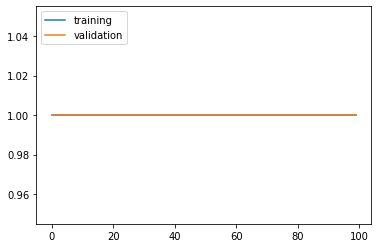

15/15 [==============================] - 0s 1ms/step
Test accuracy:  0.3333333432674408


In [16]:
history = model.fit(X_train, y_train, batch_size = 15, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

# 학습을 계속 해도 0.3 이상으로 올라가지 않음. 구분 안된것. 학습 방법에 문제가 있다는 뜻.

In [16]:
# 다른 모델 생성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128)) 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64)) 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
activation_8 (Activation)    (None, 9, 9, 64)         

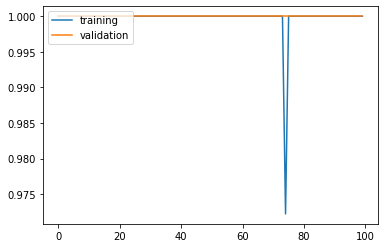

15/15 [==============================] - 0s 0us/step
Test accuracy:  0.3333333432674408


In [19]:
history = model.fit(X_train, y_train, batch_size = 15, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

# 이 모델도 0.3 이상으로 올라가지 않음. 뭐가 문제일까?

## 뭐가 문제인지 확인해보자.

In [35]:
print(model.layers[0].name)
print(model.layers[0].trainable) #전이학습을 사용할때, 해당 과정을 학습할지 안할지 정해줄 수 있음.
print(model.layers[0].output) # w, b가 적용된 결과값


w=model.layers[0].get_weights()
print(w[0].shape)  # w
print(w[1].shape)  # b

print(w[0][:,:,0,0]) #필터
print(w[0][:,:,0,1]) #필터
print(w[1][0]) #필터 1의 b
print(w[1][1]) #필터 2의 b, 근데 왜 0이지?

conv2d_5
True
Tensor("conv2d_5/BiasAdd:0", shape=(?, 22, 22, 32), dtype=float32)
(3, 3, 1, 32)
(32,)
[[ 0.05060051 -0.10593448  0.0834098 ]
 [ 0.13936557 -0.05481494  0.07707256]
 [-0.10352221 -0.04393274  0.08721152]]
[[-0.00159934  0.06498471  0.11209179]
 [-0.07741241  0.08301206 -0.07131977]
 [-0.120669    0.05484568 -0.08946604]]
0.0
0.0


(15, 22, 22, 32)


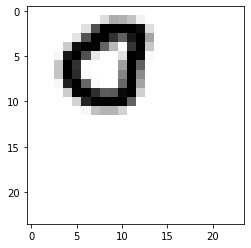

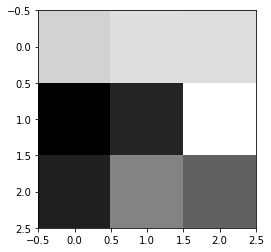

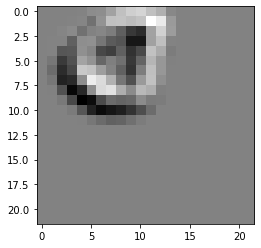

In [29]:
from keras.models import Model

my_layer_model = Model(inputs=model.input, outputs=model.layers[0].output)
output = my_layer_model.predict(X_test)

print(output.shape)

filter_num = 5
img_num = 1

# 원본 이미지
plt.imshow(X_test[img_num,:,:,0], cmap='gray') #1번째 이미지, [인덱스, 가로, 세로, 채널(흑백:0)]
plt.show()

# 필터
w=model.layers[0].get_weights()
w=w[0]
f=w[:,:,0,filter_num] #[가로, 세로, 채널, 필터넘버]
plt.imshow(f, cmap='gray')
plt.show()

# 출력 : 1번째 이미지 * (5번째 필터 + b)
plt.imshow(output[img_num,:,:,filter_num], cmap='gray') 
plt.show()

In [30]:
my_layer_model = Model(inputs=model.input, outputs=model.get_layer('flatten_3').output)
output = my_layer_model.predict(X_test)

print(output.shape)

(15, 1024)


In [45]:
my_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_8').output)
output = my_layer_model.predict(X_test)

print(output.shape)
print(output)

P=np.argmax(output, axis=1)
T=np.argmax(y_test, axis=1)
print(P)
print(T)
print(P==T)
print((P==T)*1)
print(sum((P==T)*1))
print(sum((P==T)*1)/len(P))

(15, 3)
[[1.06913946e-12 1.00000000e+00 2.25592267e-14]
 [4.97427209e-06 9.99994993e-01 7.35743321e-15]
 [3.36238171e-09 1.00000000e+00 2.70488298e-10]
 [8.21940814e-16 1.00000000e+00 2.02072448e-09]
 [4.21184509e-08 9.99998689e-01 1.34119807e-06]
 [7.95130281e-11 1.00000000e+00 1.04491329e-15]
 [2.39274878e-10 1.00000000e+00 2.23576557e-09]
 [6.22931819e-20 1.00000000e+00 1.34025845e-14]
 [9.05232835e-15 1.00000000e+00 1.67250523e-18]
 [5.81007331e-09 1.00000000e+00 2.40512922e-11]
 [1.04072198e-12 1.00000000e+00 5.22011413e-15]
 [1.46469247e-07 9.99999881e-01 1.50013735e-09]
 [2.04339698e-10 1.00000000e+00 2.13745555e-09]
 [6.88823505e-08 9.99999881e-01 3.69910248e-11]
 [1.50306369e-14 1.00000000e+00 2.46468709e-12]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[False False False False False  True  True  True  True  True False False
 False False False]
[0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
5
0.3333333333333333
